In [1]:
import pandas as pd
import time
start = time.time()
end = time.time()
elapsed_time = end - start
baseball = pd.read_csv('C:/Users/abern/OneDrive/CIND820/baseball.csv')

baseball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [2]:
#Identify the data types

baseball.dtypes

Team             object
League           object
Year              int64
RS                int64
RA                int64
W                 int64
OBP             float64
SLG             float64
BA              float64
Playoffs          int64
RankSeason      float64
RankPlayoffs    float64
G                 int64
OOBP            float64
OSLG            float64
dtype: object

In [3]:
#Identify which columns contain NA's.

baseball.isnull().sum()

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      988
RankPlayoffs    988
G                 0
OOBP            812
OSLG            812
dtype: int64

In [4]:
#Add Run Differential (RD) variable
new_col = baseball['RS'] - baseball['RA']
baseball.insert(6, 'RD', new_col)

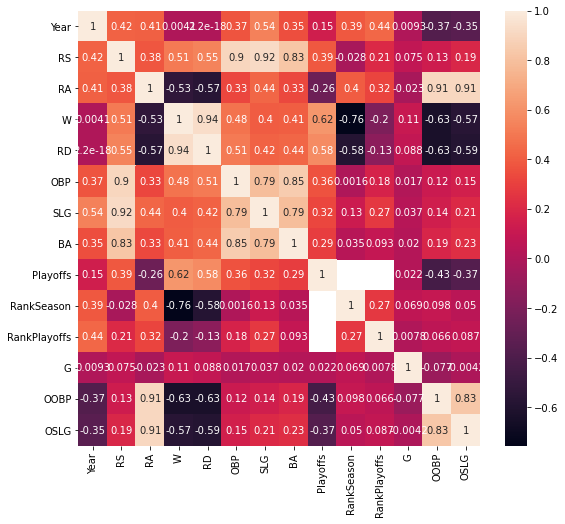

In [5]:
import seaborn as sn
import matplotlib.pyplot as plt
corr_matrix = baseball.corr()
plt.figure(figsize = (9, 8))
sn.heatmap(corr_matrix, annot = True)
plt.show()

In [6]:
#Drop unneccessary variables
baseball_1 = baseball.drop(['Team', 'League', 'RankSeason', 'RankPlayoffs', 'G'], axis = 1)
baseball_1.head()

,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,2012,734,688,81,46,0.328,0.418,0.259,0,0.317,0.415
1,2012,700,600,94,100,0.320,0.389,0.247,1,0.306,0.378
2,2012,712,705,93,7,0.311,0.417,0.247,1,0.315,0.403
3,2012,734,806,69,-72,0.315,0.415,0.260,0,0.331,0.428
4,2012,613,759,61,-146,0.302,0.378,0.240,0,0.335,0.424


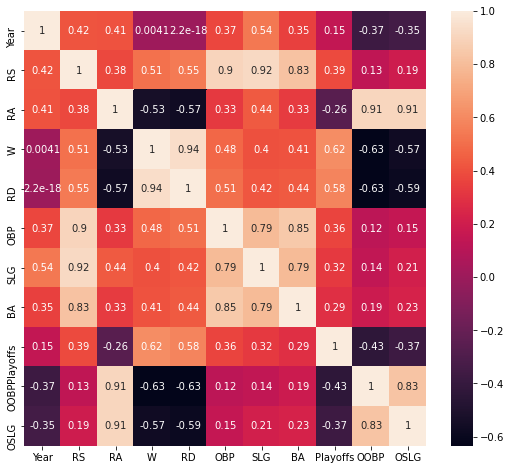

In [7]:
baseball_1_matrix = baseball_1.corr()
plt.figure(figsize = (9, 8))
sn.heatmap(baseball_1_matrix, annot = True)
plt.show()

In [8]:
#Begin process of predicting null values in OOBP
data_with_null = baseball_1
data_with_null

,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,2012,734,688,81,46,0.328,0.418,0.259,0,0.317,0.415
1,2012,700,600,94,100,0.320,0.389,0.247,1,0.306,0.378
2,2012,712,705,93,7,0.311,0.417,0.247,1,0.315,0.403
3,2012,734,806,69,-72,0.315,0.415,0.260,0,0.331,0.428
4,2012,613,759,61,-146,0.302,0.378,0.240,0,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...
1227,1962,705,759,81,-54,0.330,0.390,0.260,0,NaN,NaN
1228,1962,706,626,93,80,0.321,0.394,0.268,0,NaN,NaN
1229,1962,878,690,103,188,0.341,0.441,0.278,1,NaN,NaN
1230,1962,774,664,84,110,0.335,0.394,0.271,0,NaN,NaN


In [9]:
data_without_null = data_with_null.dropna()
data_without_null

,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,2012,734,688,81,46,0.328,0.418,0.259,0,0.317,0.415
1,2012,700,600,94,100,0.320,0.389,0.247,1,0.306,0.378
2,2012,712,705,93,7,0.311,0.417,0.247,1,0.315,0.403
3,2012,734,806,69,-72,0.315,0.415,0.260,0,0.331,0.428
4,2012,613,759,61,-146,0.302,0.378,0.240,0,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...
415,1999,872,831,86,41,0.356,0.434,0.271,0,0.345,0.423
416,1999,809,838,75,-29,0.338,0.426,0.262,0,0.355,0.427
417,1999,772,913,69,-141,0.343,0.411,0.274,0,0.371,0.448
418,1999,945,859,95,86,0.361,0.479,0.293,1,0.346,0.459


In [10]:
train_data_x = data_without_null.iloc[:,:9]
train_data_y = data_without_null.iloc[:,9]

In [11]:
train_data_x

,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs
0,2012,734,688,81,46,0.328,0.418,0.259,0
1,2012,700,600,94,100,0.320,0.389,0.247,1
2,2012,712,705,93,7,0.311,0.417,0.247,1
3,2012,734,806,69,-72,0.315,0.415,0.260,0
4,2012,613,759,61,-146,0.302,0.378,0.240,0
...,...,...,...,...,...,...,...,...,...
415,1999,872,831,86,41,0.356,0.434,0.271,0
416,1999,809,838,75,-29,0.338,0.426,0.262,0
417,1999,772,913,69,-141,0.343,0.411,0.274,0
418,1999,945,859,95,86,0.361,0.479,0.293,1


In [12]:
train_data_y

0      0.317
1      0.306
2      0.315
3      0.331
4      0.335
       ...  
415    0.345
416    0.355
417    0.371
418    0.346
419    0.353
Name: OOBP, Length: 420, dtype: float64

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_data_x, train_data_y)

LinearRegression()

In [14]:
test_data = data_with_null.iloc[:,:9]
test_data['OOBP'] = pd.DataFrame(lr.predict(test_data))
data_with_null.OOBP.fillna(test_data.OOBP, inplace = True)
data_with_null


,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,2012,734,688,81,46,0.328,0.418,0.259,0,0.317000,0.415
1,2012,700,600,94,100,0.320,0.389,0.247,1,0.306000,0.378
2,2012,712,705,93,7,0.311,0.417,0.247,1,0.315000,0.403
3,2012,734,806,69,-72,0.315,0.415,0.260,0,0.331000,0.428
4,2012,613,759,61,-146,0.302,0.378,0.240,0,0.335000,0.424
...,...,...,...,...,...,...,...,...,...,...,...
1227,1962,705,759,81,-54,0.330,0.390,0.260,0,0.341157,NaN
1228,1962,706,626,93,80,0.321,0.394,0.268,0,0.319745,NaN
1229,1962,878,690,103,188,0.341,0.441,0.278,1,0.327232,NaN
1230,1962,774,664,84,110,0.335,0.394,0.271,0,0.328567,NaN


In [15]:
data_with_null['OOBP'] = data_with_null['OOBP'].round(decimals = 3)
data_with_null

,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,2012,734,688,81,46,0.328,0.418,0.259,0,0.317,0.415
1,2012,700,600,94,100,0.320,0.389,0.247,1,0.306,0.378
2,2012,712,705,93,7,0.311,0.417,0.247,1,0.315,0.403
3,2012,734,806,69,-72,0.315,0.415,0.260,0,0.331,0.428
4,2012,613,759,61,-146,0.302,0.378,0.240,0,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...
1227,1962,705,759,81,-54,0.330,0.390,0.260,0,0.341,NaN
1228,1962,706,626,93,80,0.321,0.394,0.268,0,0.320,NaN
1229,1962,878,690,103,188,0.341,0.441,0.278,1,0.327,NaN
1230,1962,774,664,84,110,0.335,0.394,0.271,0,0.329,NaN


In [16]:
baseball_2 = data_with_null
baseball_2

,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,2012,734,688,81,46,0.328,0.418,0.259,0,0.317,0.415
1,2012,700,600,94,100,0.320,0.389,0.247,1,0.306,0.378
2,2012,712,705,93,7,0.311,0.417,0.247,1,0.315,0.403
3,2012,734,806,69,-72,0.315,0.415,0.260,0,0.331,0.428
4,2012,613,759,61,-146,0.302,0.378,0.240,0,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...
1227,1962,705,759,81,-54,0.330,0.390,0.260,0,0.341,NaN
1228,1962,706,626,93,80,0.321,0.394,0.268,0,0.320,NaN
1229,1962,878,690,103,188,0.341,0.441,0.278,1,0.327,NaN
1230,1962,774,664,84,110,0.335,0.394,0.271,0,0.329,NaN


In [17]:
#Begin predicting null values in OSLG
data2_with_null = baseball_2[['Year', 'RS', 'RA', 'W', 'RD', 'OBP', 'SLG', 'BA', 'Playoffs', 'OOBP', 'OSLG']]
data2_with_null

,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,2012,734,688,81,46,0.328,0.418,0.259,0,0.317,0.415
1,2012,700,600,94,100,0.320,0.389,0.247,1,0.306,0.378
2,2012,712,705,93,7,0.311,0.417,0.247,1,0.315,0.403
3,2012,734,806,69,-72,0.315,0.415,0.260,0,0.331,0.428
4,2012,613,759,61,-146,0.302,0.378,0.240,0,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...
1227,1962,705,759,81,-54,0.330,0.390,0.260,0,0.341,NaN
1228,1962,706,626,93,80,0.321,0.394,0.268,0,0.320,NaN
1229,1962,878,690,103,188,0.341,0.441,0.278,1,0.327,NaN
1230,1962,774,664,84,110,0.335,0.394,0.271,0,0.329,NaN


In [18]:
data2_without_null = data2_with_null.dropna()
data2_without_null

,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,2012,734,688,81,46,0.328,0.418,0.259,0,0.317,0.415
1,2012,700,600,94,100,0.320,0.389,0.247,1,0.306,0.378
2,2012,712,705,93,7,0.311,0.417,0.247,1,0.315,0.403
3,2012,734,806,69,-72,0.315,0.415,0.260,0,0.331,0.428
4,2012,613,759,61,-146,0.302,0.378,0.240,0,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...
415,1999,872,831,86,41,0.356,0.434,0.271,0,0.345,0.423
416,1999,809,838,75,-29,0.338,0.426,0.262,0,0.355,0.427
417,1999,772,913,69,-141,0.343,0.411,0.274,0,0.371,0.448
418,1999,945,859,95,86,0.361,0.479,0.293,1,0.346,0.459


In [19]:
train2_data_x = data2_without_null.iloc[:,:10]
train2_data_y = data2_without_null.iloc[:,10]

In [20]:
train2_data_x

,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP
0,2012,734,688,81,46,0.328,0.418,0.259,0,0.317
1,2012,700,600,94,100,0.320,0.389,0.247,1,0.306
2,2012,712,705,93,7,0.311,0.417,0.247,1,0.315
3,2012,734,806,69,-72,0.315,0.415,0.260,0,0.331
4,2012,613,759,61,-146,0.302,0.378,0.240,0,0.335
...,...,...,...,...,...,...,...,...,...,...
415,1999,872,831,86,41,0.356,0.434,0.271,0,0.345
416,1999,809,838,75,-29,0.338,0.426,0.262,0,0.355
417,1999,772,913,69,-141,0.343,0.411,0.274,0,0.371
418,1999,945,859,95,86,0.361,0.479,0.293,1,0.346


In [21]:
train2_data_y

0      0.415
1      0.378
2      0.403
3      0.428
4      0.424
       ...  
415    0.423
416    0.427
417    0.448
418    0.459
419    0.456
Name: OSLG, Length: 420, dtype: float64

In [22]:
lr.fit(train2_data_x, train2_data_y)

LinearRegression()

In [23]:
test2_data = data2_with_null.iloc[:,:10]
test2_data['OSLG'] = pd.DataFrame(lr.predict(test2_data))
data2_with_null.OSLG.fillna(test2_data.OSLG, inplace = True)
data2_with_null

,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,2012,734,688,81,46,0.328,0.418,0.259,0,0.317,0.415000
1,2012,700,600,94,100,0.320,0.389,0.247,1,0.306,0.378000
2,2012,712,705,93,7,0.311,0.417,0.247,1,0.315,0.403000
3,2012,734,806,69,-72,0.315,0.415,0.260,0,0.331,0.428000
4,2012,613,759,61,-146,0.302,0.378,0.240,0,0.335,0.424000
...,...,...,...,...,...,...,...,...,...,...,...
1227,1962,705,759,81,-54,0.330,0.390,0.260,0,0.341,0.418756
1228,1962,706,626,93,80,0.321,0.394,0.268,0,0.320,0.382184
1229,1962,878,690,103,188,0.341,0.441,0.278,1,0.327,0.401869
1230,1962,774,664,84,110,0.335,0.394,0.271,0,0.329,0.393010


In [24]:
data2_with_null['OSLG'] = data2_with_null['OSLG'].round(decimals = 3)
data2_with_null

,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,2012,734,688,81,46,0.328,0.418,0.259,0,0.317,0.415
1,2012,700,600,94,100,0.320,0.389,0.247,1,0.306,0.378
2,2012,712,705,93,7,0.311,0.417,0.247,1,0.315,0.403
3,2012,734,806,69,-72,0.315,0.415,0.260,0,0.331,0.428
4,2012,613,759,61,-146,0.302,0.378,0.240,0,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...
1227,1962,705,759,81,-54,0.330,0.390,0.260,0,0.341,0.419
1228,1962,706,626,93,80,0.321,0.394,0.268,0,0.320,0.382
1229,1962,878,690,103,188,0.341,0.441,0.278,1,0.327,0.402
1230,1962,774,664,84,110,0.335,0.394,0.271,0,0.329,0.393


In [25]:
baseball_3 = data2_with_null

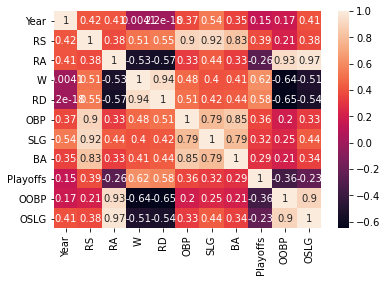

In [26]:
#Correlation matrix with null values predicted
baseball_3_matrix = baseball_3.corr()
sn.heatmap(baseball_3_matrix, annot = True)
plt.show()

In [27]:
baseball_3

,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,2012,734,688,81,46,0.328,0.418,0.259,0,0.317,0.415
1,2012,700,600,94,100,0.320,0.389,0.247,1,0.306,0.378
2,2012,712,705,93,7,0.311,0.417,0.247,1,0.315,0.403
3,2012,734,806,69,-72,0.315,0.415,0.260,0,0.331,0.428
4,2012,613,759,61,-146,0.302,0.378,0.240,0,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...
1227,1962,705,759,81,-54,0.330,0.390,0.260,0,0.341,0.419
1228,1962,706,626,93,80,0.321,0.394,0.268,0,0.320,0.382
1229,1962,878,690,103,188,0.341,0.441,0.278,1,0.327,0.402
1230,1962,774,664,84,110,0.335,0.394,0.271,0,0.329,0.393


In [28]:
baseball_4 = baseball_3.drop(['Year'], axis = 1)

In [29]:
#ANOVA feature selection for numeric inputs and categorical output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = baseball_4.drop(['Playoffs'], axis = 1)
print(X)

       RS   RA    W   RD    OBP    SLG     BA   OOBP   OSLG
0     734  688   81   46  0.328  0.418  0.259  0.317  0.415
1     700  600   94  100  0.320  0.389  0.247  0.306  0.378
2     712  705   93    7  0.311  0.417  0.247  0.315  0.403
3     734  806   69  -72  0.315  0.415  0.260  0.331  0.428
4     613  759   61 -146  0.302  0.378  0.240  0.335  0.424
...   ...  ...  ...  ...    ...    ...    ...    ...    ...
1227  705  759   81  -54  0.330  0.390  0.260  0.341  0.419
1228  706  626   93   80  0.321  0.394  0.268  0.320  0.382
1229  878  690  103  188  0.341  0.441  0.278  0.327  0.402
1230  774  664   84  110  0.335  0.394  0.271  0.329  0.393
1231  599  716   60 -117  0.308  0.373  0.250  0.340  0.409

[1232 rows x 9 columns]


In [30]:
y = baseball_4['Playoffs']
print(y)

0       0
1       1
2       1
3       0
4       0
       ..
1227    0
1228    0
1229    1
1230    0
1231    0
Name: Playoffs, Length: 1232, dtype: int64


In [31]:
fvalue_Best = SelectKBest(f_classif, k = 5)
X_kbest = fvalue_Best.fit_transform(X, y)
X_kbest = X_kbest.round(decimals = 3)
X_kbest

array([[ 7.34e+02,  8.10e+01,  4.60e+01,  3.28e-01,  3.17e-01],
       [ 7.00e+02,  9.40e+01,  1.00e+02,  3.20e-01,  3.06e-01],
       [ 7.12e+02,  9.30e+01,  7.00e+00,  3.11e-01,  3.15e-01],
       ...,
       [ 8.78e+02,  1.03e+02,  1.88e+02,  3.41e-01,  3.27e-01],
       [ 7.74e+02,  8.40e+01,  1.10e+02,  3.35e-01,  3.29e-01],
       [ 5.99e+02,  6.00e+01, -1.17e+02,  3.08e-01,  3.40e-01]])

In [32]:
category = pd.cut(baseball_4.W, bins = [ 40, 60, 80, 100, 120], labels = ['40-59', '60-79', '80-99', '100-119'])

In [33]:
baseball_4.insert(loc = 8, column = 'Category', value = category)

In [34]:
baseball_4

,RS,RA,W,RD,OBP,SLG,BA,Playoffs,Category,OOBP,OSLG
0,734,688,81,46,0.328,0.418,0.259,0,80-99,0.317,0.415
1,700,600,94,100,0.320,0.389,0.247,1,80-99,0.306,0.378
2,712,705,93,7,0.311,0.417,0.247,1,80-99,0.315,0.403
3,734,806,69,-72,0.315,0.415,0.260,0,60-79,0.331,0.428
4,613,759,61,-146,0.302,0.378,0.240,0,60-79,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...
1227,705,759,81,-54,0.330,0.390,0.260,0,80-99,0.341,0.419
1228,706,626,93,80,0.321,0.394,0.268,0,80-99,0.320,0.382
1229,878,690,103,188,0.341,0.441,0.278,1,100-119,0.327,0.402
1230,774,664,84,110,0.335,0.394,0.271,0,80-99,0.329,0.393


In [35]:
baseball_4.dtypes

RS             int64
RA             int64
W              int64
RD             int64
OBP          float64
SLG          float64
BA           float64
Playoffs       int64
Category    category
OOBP         float64
OSLG         float64
dtype: object

Text(0.5, 1.0, 'Opponents Slugging %')

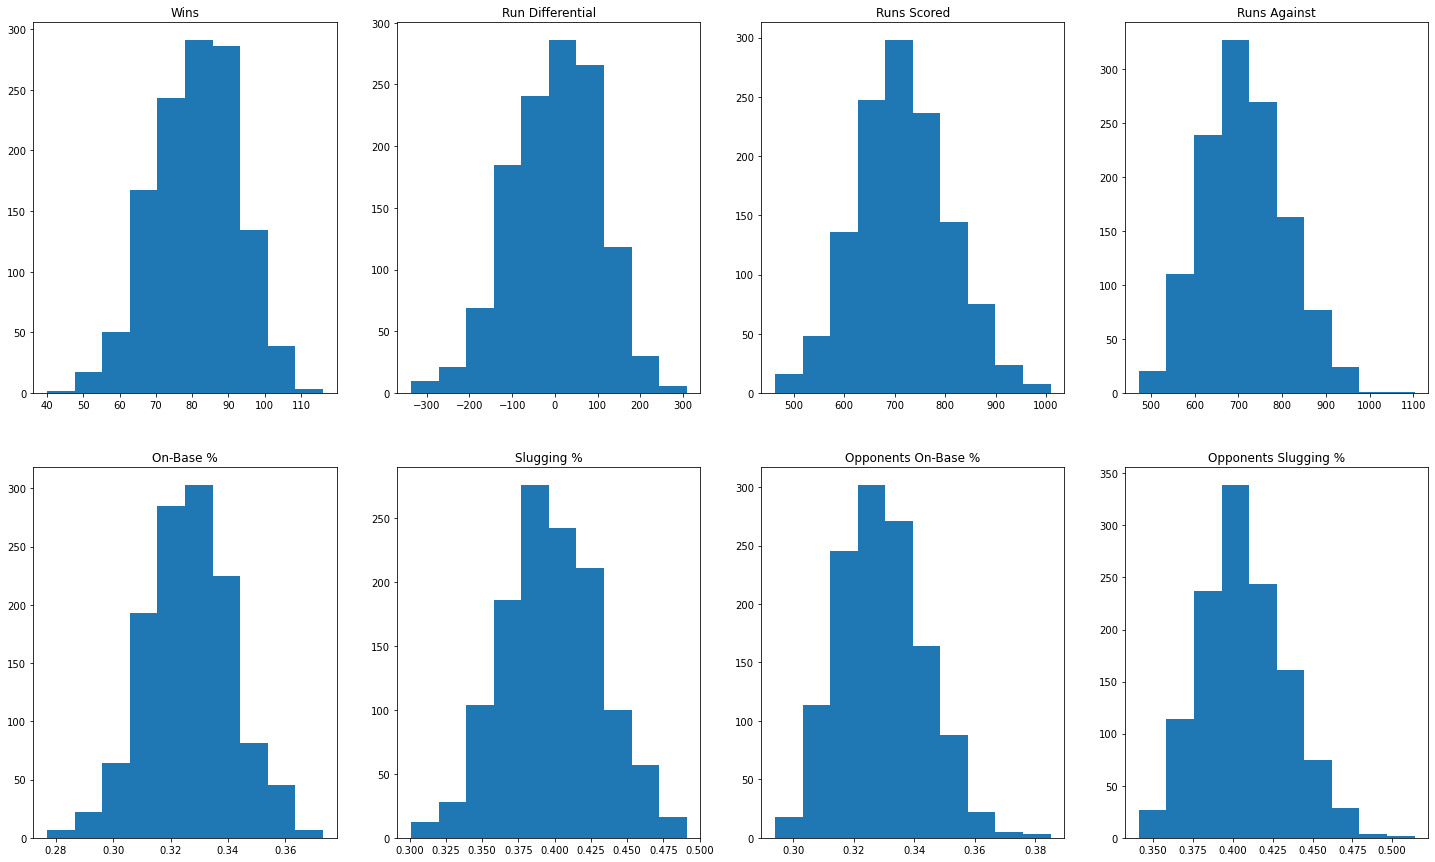

In [36]:
#Histograms of Variables
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,4, figsize = (25, 15))

ax[0,0].hist(baseball_4['W'])
ax[0,0].set_title("Wins")

ax[0,1].hist(baseball_4['RD'])
ax[0,1].set_title("Run Differential")

ax[0,2].hist(baseball_4['RS'])
ax[0,2].set_title("Runs Scored")

ax[0,3].hist(baseball_4['RA'])
ax[0,3].set_title("Runs Against")

ax[1,0].hist(baseball_4['OBP'])
ax[1,0].set_title("On-Base %")

ax[1,1].hist(baseball_4['SLG'])
ax[1,1].set_title("Slugging %")

ax[1,2].hist(baseball_4['OOBP'])
ax[1,2].set_title("Opponents On-Base %")

ax[1,3].hist(baseball_4['OSLG'])
ax[1,3].set_title("Opponents Slugging %")

In [37]:
#Perform Shapiro-Wilk Test to test if dataset is normally distributed

from scipy.stats import shapiro
from numpy.random import randn

shapiro(baseball_4.drop('Category', 1))

C:\Users\abern\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.6179234981536865, pvalue=0.0)

In [38]:
from sklearn import preprocessing

baseball_5 = baseball_4.drop('Category', 1)

baseball_norm = preprocessing.normalize(baseball_5)

baseball_6 = pd.DataFrame(baseball_norm, columns  = ['RS', 'RA', 'W', 'RD', 'OBP', 'SLG', 'BA', 'Playoffs', 'OOBP', 'OSLG'])

baseball_6.dtypes

RS          float64
RA          float64
W           float64
RD          float64
OBP         float64
SLG         float64
BA          float64
Playoffs    float64
OOBP        float64
OSLG        float64
dtype: object

In [39]:
baseball_6

,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,0.726491,0.680962,0.080171,0.045529,0.000325,0.000414,0.000256,0.000000,0.000314,0.000411
1,0.750981,0.643698,0.100846,0.107283,0.000343,0.000417,0.000265,0.001073,0.000328,0.000406
2,0.707532,0.700576,0.092416,0.006956,0.000309,0.000414,0.000245,0.000994,0.000313,0.000400
3,0.670512,0.736284,0.063032,-0.065772,0.000288,0.000379,0.000238,0.000000,0.000302,0.000391
4,0.620209,0.767926,0.061717,-0.147717,0.000306,0.000382,0.000243,0.000000,0.000339,0.000429
...,...,...,...,...,...,...,...,...,...,...
1227,0.677577,0.729476,0.077849,-0.051899,0.000317,0.000375,0.000250,0.000000,0.000328,0.000403
1228,0.741983,0.657905,0.097740,0.084077,0.000337,0.000414,0.000282,0.000000,0.000336,0.000401
1229,0.772157,0.606820,0.090583,0.165337,0.000300,0.000388,0.000244,0.000879,0.000288,0.000354
1230,0.752084,0.645199,0.081622,0.106885,0.000326,0.000383,0.000263,0.000000,0.000320,0.000382


In [40]:
#Perform Shapiro-Wilk Test on Wins variable to test if dataset is normally distributed

from scipy.stats import shapiro

Dataset = print('Dataset:', shapiro(baseball_6))
Wins = print('Wins:', shapiro(baseball_6['W']))
RS = print('RS:', shapiro(baseball_6['RS']))
RD = print('RD:', shapiro(baseball_6['RD']))
RA = print('RA:', shapiro(baseball_6['RA']))
BA = print('BA:', shapiro(baseball_6['BA']))
OBP = print('OBP:', shapiro(baseball_6['OBP']))
SLG = print('SLG:', shapiro(baseball_6['SLG']))
OOBP = print('OOBP:', shapiro(baseball_6['OOBP']))
OSLG = print('OSLG:', shapiro(baseball_6['OSLG']))

print(Dataset, Wins, RS, RA, RA, BA, OBP, SLG, OOBP, OSLG)

Dataset: ShapiroResult(statistic=0.6048439741134644, pvalue=0.0)
Wins: ShapiroResult(statistic=0.9974715113639832, pvalue=0.050475846976041794)
RS: ShapiroResult(statistic=0.9655008912086487, pvalue=1.5891077920830542e-16)
RD: ShapiroResult(statistic=0.9947056174278259, pvalue=0.0002453640045132488)
RA: ShapiroResult(statistic=0.9873567819595337, pvalue=7.587037664791296e-09)
BA: ShapiroResult(statistic=0.9950001835823059, pvalue=0.0004146634601056576)
OBP: ShapiroResult(statistic=0.9958947896957397, pvalue=0.0021826643496751785)
SLG: ShapiroResult(statistic=0.998704731464386, pvalue=0.5120285153388977)
OOBP: ShapiroResult(statistic=0.9888419508934021, pvalue=4.4583927660823974e-08)
OSLG: ShapiroResult(statistic=0.9965800046920776, pvalue=0.008322722278535366)
None None None None None None None None None None


C:\Users\abern\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [41]:
baseball_6.corr(method = 'pearson')

,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
RS,1.000000,-0.962768,0.737314,0.990764,0.309868,0.602510,0.292880,0.524401,-0.290478,-0.482655
RA,-0.962768,1.000000,-0.740571,-0.990532,-0.298612,-0.573090,-0.275647,-0.613925,0.296763,0.498078
W,0.737314,-0.740571,1.000000,0.745908,0.786533,0.818479,0.752716,0.442677,0.337080,0.134827
RD,0.990764,-0.990532,0.745908,1.000000,0.307147,0.593440,0.287000,0.574257,-0.296373,-0.494947
OBP,0.309868,-0.298612,0.786533,0.307147,1.000000,0.721152,0.946865,0.102546,0.778122,0.617216
SLG,0.602510,-0.573090,0.818479,0.593440,0.721152,1.000000,0.747850,0.279985,0.382937,0.232704
BA,0.292880,-0.275647,0.752716,0.287000,0.946865,0.747850,1.000000,0.077409,0.759820,0.611608
Playoffs,0.524401,-0.613925,0.442677,0.574257,0.102546,0.279985,0.077409,1.000000,-0.263883,-0.343425
OOBP,-0.290478,0.296763,0.337080,-0.296373,0.778122,0.382937,0.759820,-0.263883,1.000000,0.936679
OSLG,-0.482655,0.498078,0.134827,-0.494947,0.617216,0.232704,0.611608,-0.343425,0.936679,1.000000


In [42]:
baseball_6.corr(method = 'spearman')

,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
RS,1.000000,-0.999656,0.734802,0.999890,0.291239,0.584805,0.273090,0.585091,-0.305824,-0.505754
RA,-0.999656,1.000000,-0.750277,-0.999914,-0.309856,-0.597688,-0.291160,-0.586140,0.287156,0.488661
W,0.734802,-0.750277,1.000000,0.742918,0.774019,0.810488,0.739988,0.449681,0.301880,0.097028
RD,0.999890,-0.999914,0.742918,1.000000,0.300994,0.591434,0.282578,0.585829,-0.295963,-0.496777
OBP,0.291239,-0.309856,0.774019,0.300994,1.000000,0.690874,0.941808,0.122079,0.751509,0.577757
SLG,0.584805,-0.597688,0.810488,0.591434,0.690874,1.000000,0.719274,0.294415,0.336708,0.185119
BA,0.273090,-0.291160,0.739988,0.282578,0.941808,0.719274,1.000000,0.091969,0.735225,0.573351
Playoffs,0.585091,-0.586140,0.449681,0.585829,0.122079,0.294415,0.091969,1.000000,-0.257437,-0.337424
OOBP,-0.305824,0.287156,0.301880,-0.295963,0.751509,0.336708,0.735225,-0.257437,1.000000,0.924178
OSLG,-0.505754,0.488661,0.097028,-0.496777,0.577757,0.185119,0.573351,-0.337424,0.924178,1.000000


Text(0.5, 1.0, 'Opponents Slugging %')

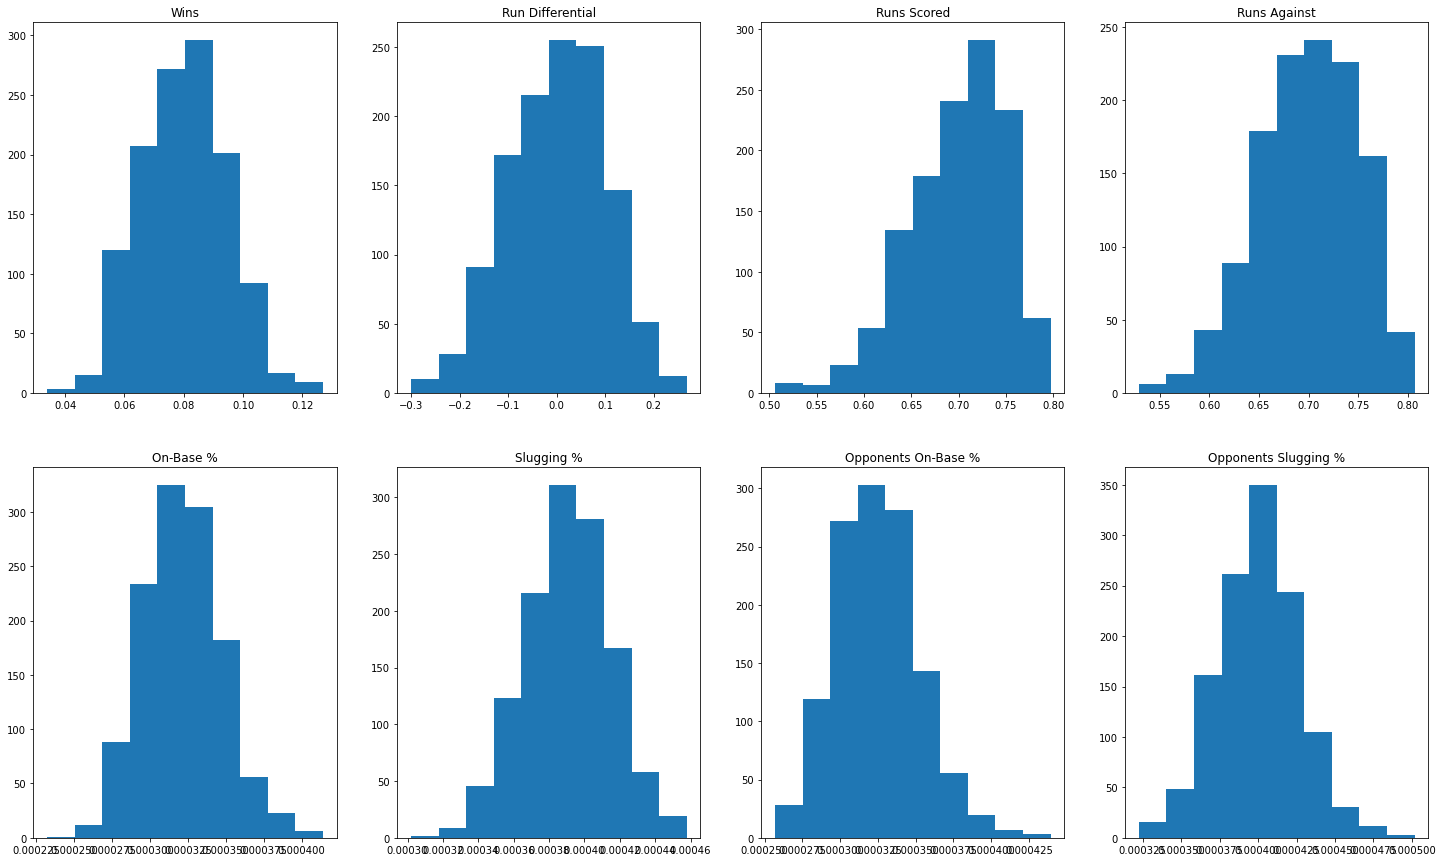

In [43]:
#Histograms of Variables
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,4, figsize = (25, 15))

ax[0,0].hist(baseball_6['W'])
ax[0,0].set_title("Wins")

ax[0,1].hist(baseball_6['RD'])
ax[0,1].set_title("Run Differential")

ax[0,2].hist(baseball_6['RS'])
ax[0,2].set_title("Runs Scored")

ax[0,3].hist(baseball_6['RA'])
ax[0,3].set_title("Runs Against")

ax[1,0].hist(baseball_6['OBP'])
ax[1,0].set_title("On-Base %")

ax[1,1].hist(baseball_6['SLG'])
ax[1,1].set_title("Slugging %")

ax[1,2].hist(baseball_6['OOBP'])
ax[1,2].set_title("Opponents On-Base %")

ax[1,3].hist(baseball_6['OSLG'])
ax[1,3].set_title("Opponents Slugging %")

<AxesSubplot:xlabel='W', ylabel='Playoffs'>

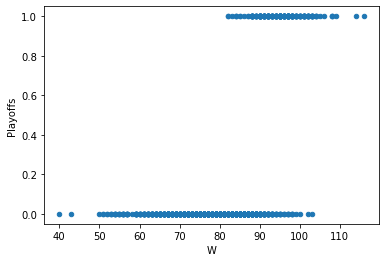

In [44]:
#Plot for Wins versus Playoffs
#0 = Did not make the playoffs.
#1 = Made the playoffs.
baseball_3.plot(kind = 'scatter', x = 'W', y = 'Playoffs')

Text(0.5, 1.0, 'Wins vs. OSLG')

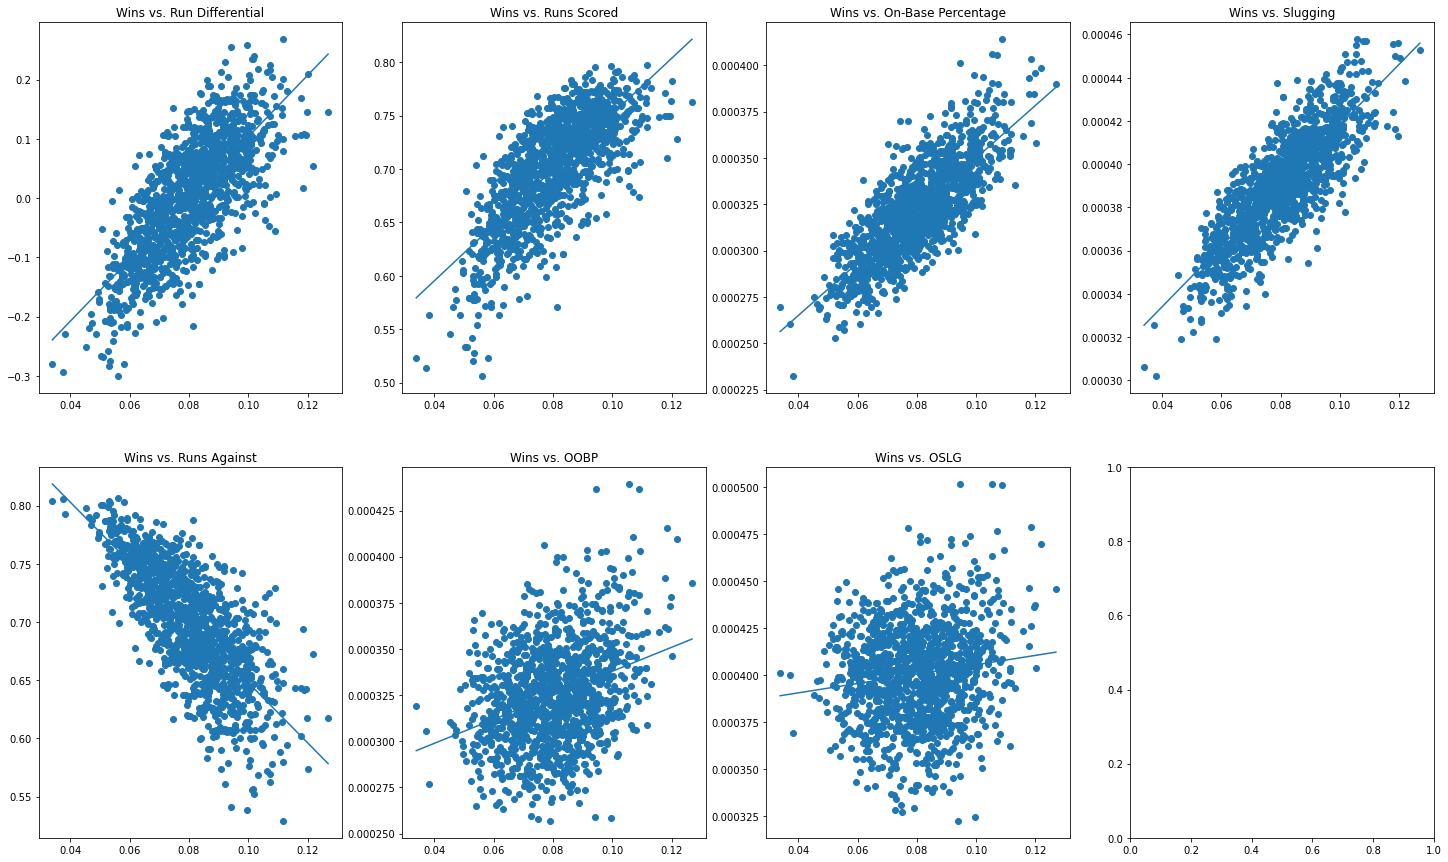

In [45]:
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(2,4, figsize = (25, 15))

Wins = baseball_6['W']
RD = baseball_6['RD']
RS = baseball_6['RS']
OBP = baseball_6['OBP']
SLG = baseball_6['SLG']
RA = baseball_6['RA']
OOBP = baseball_6['OOBP']
OSLG = baseball_6['OSLG']


ax[0,0].scatter(Wins, RD)
ax[0,0].set_title("Wins vs. Run Differential")
ax[0,0].plot(np.unique(Wins), np.poly1d(np.polyfit(Wins, RD, 1))(np.unique(Wins)))

ax[0,1].scatter(Wins, RS)
ax[0,1].plot(np.unique(Wins), np.poly1d(np.polyfit(Wins, RS, 1))(np.unique(Wins)))
ax[0,1].set_title("Wins vs. Runs Scored")

ax[0,2].scatter(Wins, OBP)
ax[0,2].plot(np.unique(Wins), np.poly1d(np.polyfit(Wins, OBP, 1))(np.unique(Wins)))
ax[0,2].set_title("Wins vs. On-Base Percentage")

ax[0,3].scatter(Wins, SLG)
ax[0,3].plot(np.unique(Wins), np.poly1d(np.polyfit(Wins, SLG, 1))(np.unique(Wins)))
ax[0,3].set_title("Wins vs. Slugging")

ax[1,0].scatter(Wins, RA)
ax[1,0].plot(np.unique(Wins), np.poly1d(np.polyfit(Wins, RA, 1))(np.unique(Wins)))
ax[1,0].set_title("Wins vs. Runs Against")

ax[1,1].scatter(Wins, OOBP)
ax[1,1].plot(np.unique(Wins), np.poly1d(np.polyfit(Wins, OOBP, 1))(np.unique(Wins)))
ax[1,1].set_title("Wins vs. OOBP")

ax[1,2].scatter(Wins, OSLG)
ax[1,2].plot(np.unique(Wins), np.poly1d(np.polyfit(Wins, OSLG, 1))(np.unique(Wins)))
ax[1,2].set_title("Wins vs. OSLG")

In [46]:
#Begin predicting for 2002 teams

new_col1 = baseball['Team']
baseball_3.insert(0, 'Team', new_col1)
baseball_pred = baseball_3[baseball_3['Year'] <= 2002].reset_index(drop = True)
baseball_pred

,Team,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,ANA,2002,851,644,99,207,0.341,0.433,0.282,1,0.314,0.392
1,ARI,2002,819,674,98,145,0.346,0.423,0.267,1,0.305,0.397
2,ATL,2002,708,565,101,143,0.331,0.409,0.260,1,0.313,0.364
3,BAL,2002,667,773,67,-106,0.309,0.403,0.246,0,0.336,0.435
4,BOS,2002,859,665,93,194,0.345,0.444,0.277,0,0.308,0.385
...,...,...,...,...,...,...,...,...,...,...,...,...
927,PHI,1962,705,759,81,-54,0.330,0.390,0.260,0,0.341,0.419
928,PIT,1962,706,626,93,80,0.321,0.394,0.268,0,0.320,0.382
929,SFG,1962,878,690,103,188,0.341,0.441,0.278,1,0.327,0.402
930,STL,1962,774,664,84,110,0.335,0.394,0.271,0,0.329,0.393


In [47]:
#OLS Summary without RD included as per Prachi Agarwal

import statsmodels.api as sm

start = time.time()
X = baseball_pred[['RS', 'RA', 'OBP', 'SLG', 'OOBP', 'OSLG']]
xc = sm.add_constant(X)
Y = baseball_pred['W']
model = sm.OLS(Y, xc).fit()
print(model.summary())
end = time.time()
elapsed_time = end - start
print('Elapsed time:', elapsed_time, 'seconds')

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1354.
Date:                Sat, 01 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:13:31   Log-Likelihood:                -2536.6
No. Observations:                 932   AIC:                             5087.
Df Residuals:                     925   BIC:                             5121.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        182.4482     11.570     15.770      0.0

In [48]:
#OLS Summary with RD included

start = time.time()
X = baseball_pred[['RS', 'RA', 'RD', 'OBP', 'SLG', 'OOBP', 'OSLG']]
xc = sm.add_constant(X)
Y = baseball_pred['W']
model = sm.OLS(Y, xc).fit()
print(model.summary())
end = time.time()
elapsed_time = end - start
print('Elapsed time:', elapsed_time, 'seconds')

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1354.
Date:                Sat, 01 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:13:31   Log-Likelihood:                -2536.6
No. Observations:                 932   AIC:                             5087.
Df Residuals:                     925   BIC:                             5121.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        182.4482     11.570     15.770      0.0

In [49]:
#Pull the 2002 stats from Oakland, Toronto and Montreal 

baseball_pred.loc[(baseball_pred['Team'].isin(['OAK', 'TOR', 'MON'])) & (baseball_pred['Year'] == 2002)]

,Team,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
17,MON,2002,735,718,83,17,0.334,0.418,0.261,0,0.329,0.421
20,OAK,2002,800,654,103,146,0.339,0.432,0.261,1,0.315,0.384
29,TOR,2002,813,828,78,-15,0.327,0.430,0.261,0,0.344,0.431


In [50]:
#Extract variables OBP, SLG, and RS from the data frame as per Prachi Agarwal.
#Linear Regression performed on RS given OBP and SLG

start = time.time()
s = baseball_pred[['OBP', 'SLG']].values
b = baseball_pred[['RS']].values
RS_model = LinearRegression()
RS_model.fit(s, b)
print(RS_model.intercept_)
print(RS_model.coef_)
end = time.time()
elapsed_time = end - start
print('Elapsed time:', elapsed_time, 'seconds')

[-804.98326429]
[[2746.92720094 1577.00829176]]
Elapsed time: 0.009972333908081055 seconds


In [51]:
#Extract variables OOBP, OSLG and RA from the data grame as per Prachi Agarwal
#Linear Regression performed on RA given OBP and SLG

start = time.time()
s1 = baseball_pred[['OOBP', 'OSLG']]
b1 = baseball_pred[['RA']]
RA_model = LinearRegression()
RA_model.fit(s1, b1)
print(RA_model.intercept_)
print(RA_model.coef_)
end = time.time()
elapsed_time = end - start
print('Elapsed time:', elapsed_time, 'seconds')

[-914.81287688]
[[1478.4491446  2803.08032858]]
Elapsed time: 0.012964248657226562 seconds


In [52]:
#Extract variables RD and W from the data frame for Linear Regression.

start = time.time()
s2 = baseball_pred[['RD']]
b2 = baseball_pred[['W']]
W_model = LinearRegression()
W_model.fit(s2, b2)
print(W_model.intercept_)
print(W_model.coef_)
end = time.time()
elapsed_time = end - start
print('Elapsed time:', elapsed_time, 'seconds')

[80.87982833]
[[0.10562566]]
Elapsed time: 0.015957117080688477 seconds


In [53]:
#Predict RS, RA, RD, and W for Oakland based on OBP and SLG

start = time.time()
RS_O = RS_model.predict([[0.339, 0.432]])
RA_O = RA_model.predict([[0.315, 0.384]])
RD_O = RS_O - RA_O
W_O = W_model.predict(RS_O - RA_O)
Oakland = baseball_pred.loc[(baseball_pred['Team'].isin(['OAK'])) & (baseball_pred['Year'] == 2002)]

print("Runs Scored:", RS_O )
print("Runs Against:", RA_O)
print("Run Differential:", RD_O)
print("Wins:", W_O)
print(Oakland)
end = time.time()
elapsed_time = end - start
print('Elapsed time:', elapsed_time, 'seconds')

Runs Scored: [[807.49263887]]
Runs Against: [[627.28144985]]
Run Differential: [[180.21118902]]
Wins: [[99.91475321]]
   Team  Year   RS   RA    W   RD    OBP    SLG     BA  Playoffs   OOBP   OSLG
20  OAK  2002  800  654  103  146  0.339  0.432  0.261         1  0.315  0.384
Elapsed time: 0.019754648208618164 seconds


C:\Users\abern\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\abern\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [54]:
#Predict RS, RA, RD, W for Toronto based on OBP and SLG

start = time.time()
RS_T = RS_model.predict([[0.327, 0.430]])
RA_T = RA_model.predict([[0.344, 0.431]])
RD_T = RS_T - RA_T
W_T = W_model.predict(RS_T - RA_T)
Toronto = baseball_pred.loc[(baseball_pred['Team'].isin(['TOR'])) & (baseball_pred['Year'] == 2002)]

print("Runs Scored:", RS_T )
print("Runs Against:", RA_T)
print("Run Differential:", RD_T)
print("Wins:", W_T)
print(Toronto)
end = time.time()
elapsed_time = end - start
print('Elapsed time:', elapsed_time, 'seconds')

Runs Scored: [[771.37549587]]
Runs Against: [[801.90125048]]
Run Differential: [[-30.52575461]]
Wins: [[77.6555255]]
   Team  Year   RS   RA   W  RD    OBP   SLG     BA  Playoffs   OOBP   OSLG
29  TOR  2002  813  828  78 -15  0.327  0.43  0.261         0  0.344  0.431
Elapsed time: 0.022967815399169922 seconds


C:\Users\abern\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\abern\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [55]:
#Predict RS, RA, RD, W for Montreal based on OBP and SLG

start = time.time()
RS_M = RS_model.predict([[0.334, 0.418]])
RA_M = RA_model.predict([[0.329, 0.421]])
RD_M = RS_M - RA_M
W_M = W_model.predict(RS_M - RA_M)
Montreal = baseball_pred.loc[(baseball_pred['Team'].isin(['MON'])) & (baseball_pred['Year'] == 2002)]

print("Runs Scored:", RS_M)
print("Runs Against:", RA_M)
print("Run Differential:", RD_M)
print("Wins:", W_M)
print(Montreal)
end = time.time()
elapsed_time = end - start
print('Elapsed time:', elapsed_time, 'seconds')

Runs Scored: [[771.67988678]]
Runs Against: [[751.69371003]]
Run Differential: [[19.98617675]]
Wins: [[82.99088134]]
   Team  Year   RS   RA   W  RD    OBP    SLG     BA  Playoffs   OOBP   OSLG
17  MON  2002  735  718  83  17  0.334  0.418  0.261         0  0.329  0.421
Elapsed time: 0.02330636978149414 seconds


C:\Users\abern\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\abern\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [56]:
#Paul DePodesta predicted the number of wins needed to make the playoffs given run differential

from sklearn import svm
from sklearn.model_selection import train_test_split

In [61]:
X = np.array(baseball_pred['RD']).reshape(-1, 1)
y = np.array(baseball_pred['W']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()

m = regr.fit(X_train, y_train)
m. get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [62]:
print(regr.score(X_test, y_test))

0.9246942787962699


In [63]:
#DePodesta predicted a run differential of 133 was needed to win 95 games

regr.predict(np.array(133).reshape(-1, 1))

array([[95.68111794]])

In [65]:
baseball_pred = baseball_3[(baseball_3['Year'] == 2002) & (baseball_3['Playoffs'] == 1)].reset_index(drop = True)
baseball_pred

,Team,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,ANA,2002,851,644,99,207,0.341,0.433,0.282,1,0.314,0.392
1,ARI,2002,819,674,98,145,0.346,0.423,0.267,1,0.305,0.397
2,ATL,2002,708,565,101,143,0.331,0.409,0.260,1,0.313,0.364
3,MIN,2002,768,712,94,56,0.332,0.437,0.272,1,0.318,0.421
4,NYY,2002,897,697,103,200,0.354,0.455,0.275,1,0.309,0.395
5,OAK,2002,800,654,103,146,0.339,0.432,0.261,1,0.315,0.384
6,SFG,2002,783,616,95,167,0.344,0.442,0.267,1,0.319,0.372
7,STL,2002,787,648,97,139,0.338,0.425,0.268,1,0.323,0.386
